In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor


import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

# 선형 회귀분석모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인
from statsmodels.api import qqplot

In [85]:
matplotlib.rc('font',family='NanumGothic ECO')
matplotlib.rc('axes',unicode_minus=False)

%matplotlib inline

In [86]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [87]:
df_raw = pd.read_csv("/home/piai/28기 임채훈/01 실습파일/2. Big Data 분석/SCALE불량.csv",encoding='euc-kr')
df_raw.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조


In [5]:
df_raw.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

<Axes: >

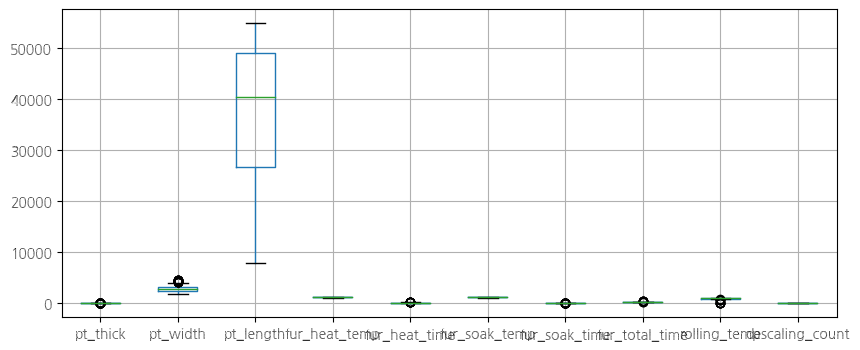

In [6]:
df_raw.boxplot(figsize=(10,4))

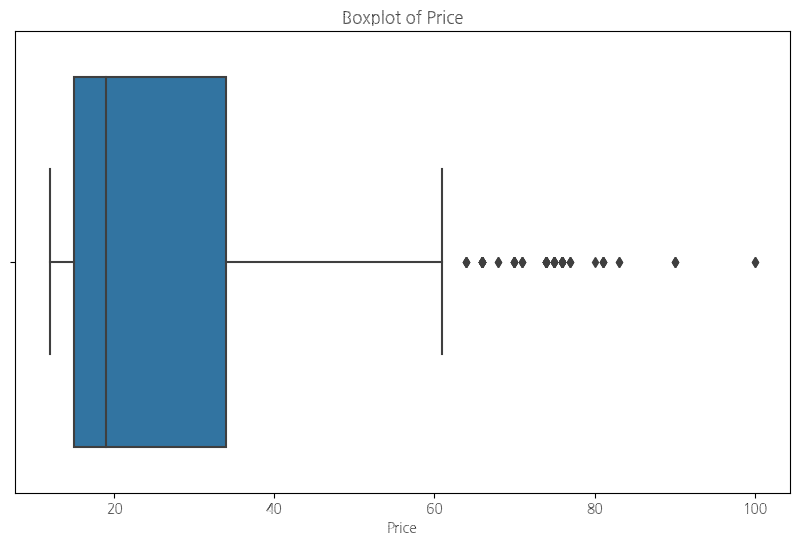

In [9]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_raw['pt_thick'])
plt.title('Boxplot of Price')
plt.xlabel('pt_thick')
plt.show()


In [12]:
new  = df_raw[df_raw['pt_thick'] >= 100]
new

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
859,PLT_1860,09JAN2023:07:02:20,불량,JS-SM400A,일본,C,100,2300,9500,적용,...,2열,1144,85,1150,52,219,CR(제어압연),1050,6,3조
860,PLT_1861,09JAN2023:07:10:12,불량,JS-SM400A,일본,C,100,2300,9500,적용,...,1열,1130,78,1137,61,206,CR(제어압연),1037,6,3조


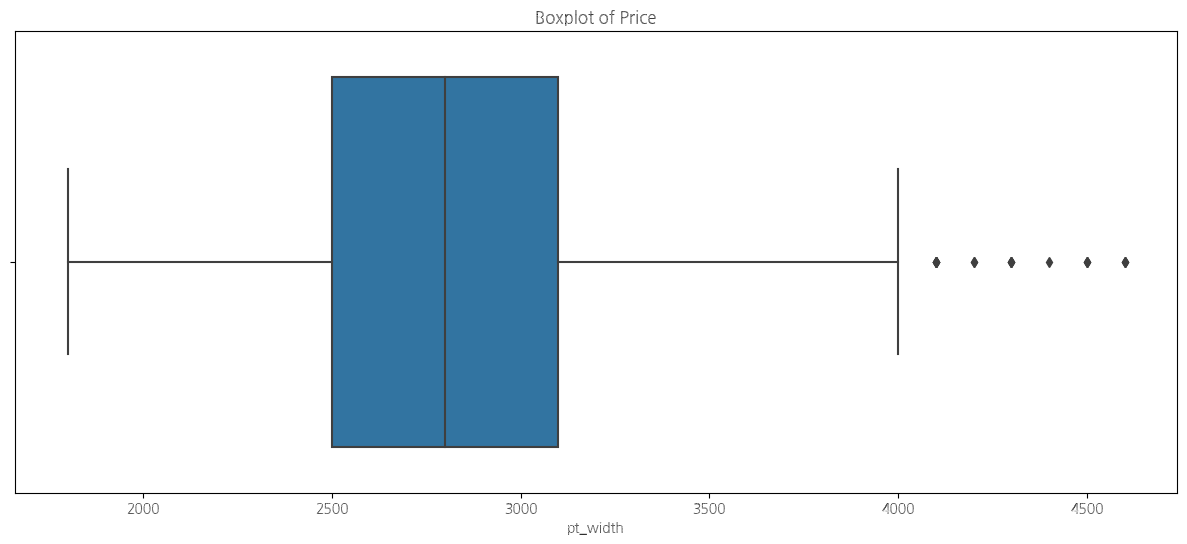

In [16]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=df_raw['pt_width'])
plt.title('Boxplot of Price')
plt.xlabel('pt_width')
plt.show()

In [17]:
new  = df_raw[df_raw['pt_width'] >= 4500]
new

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
416,PLT_1417,06JAN2023:05:14:28,양품,BV-AH32,프랑스,C,16,4600,24100,적용,...,2열,1174,71,1167,58,190,CR(제어압연),933,10,2조
419,PLT_1420,06JAN2023:05:32:53,불량,LR-AH32,영국,C,20,4500,20700,적용,...,1열,1154,77,1160,50,182,CR(제어압연),961,7,2조
420,PLT_1421,06JAN2023:05:40:28,양품,LR-AH32,영국,C,20,4500,20700,적용,...,2열,1163,82,1160,53,191,CR(제어압연),959,8,2조
422,PLT_1423,06JAN2023:05:54:03,불량,KR-A,한국,C,24,4500,20900,적용,...,2열,1149,63,1164,65,226,CR(제어압연),976,7,2조
425,PLT_1426,06JAN2023:06:27:54,양품,LR-A,영국,C,24,4600,17300,적용,...,1열,1146,75,1157,52,207,CR(제어압연),957,8,2조
426,PLT_1427,06JAN2023:06:42:19,양품,LR-A,영국,C,24,4600,17300,적용,...,2열,1160,77,1160,64,226,CR(제어압연),956,8,2조


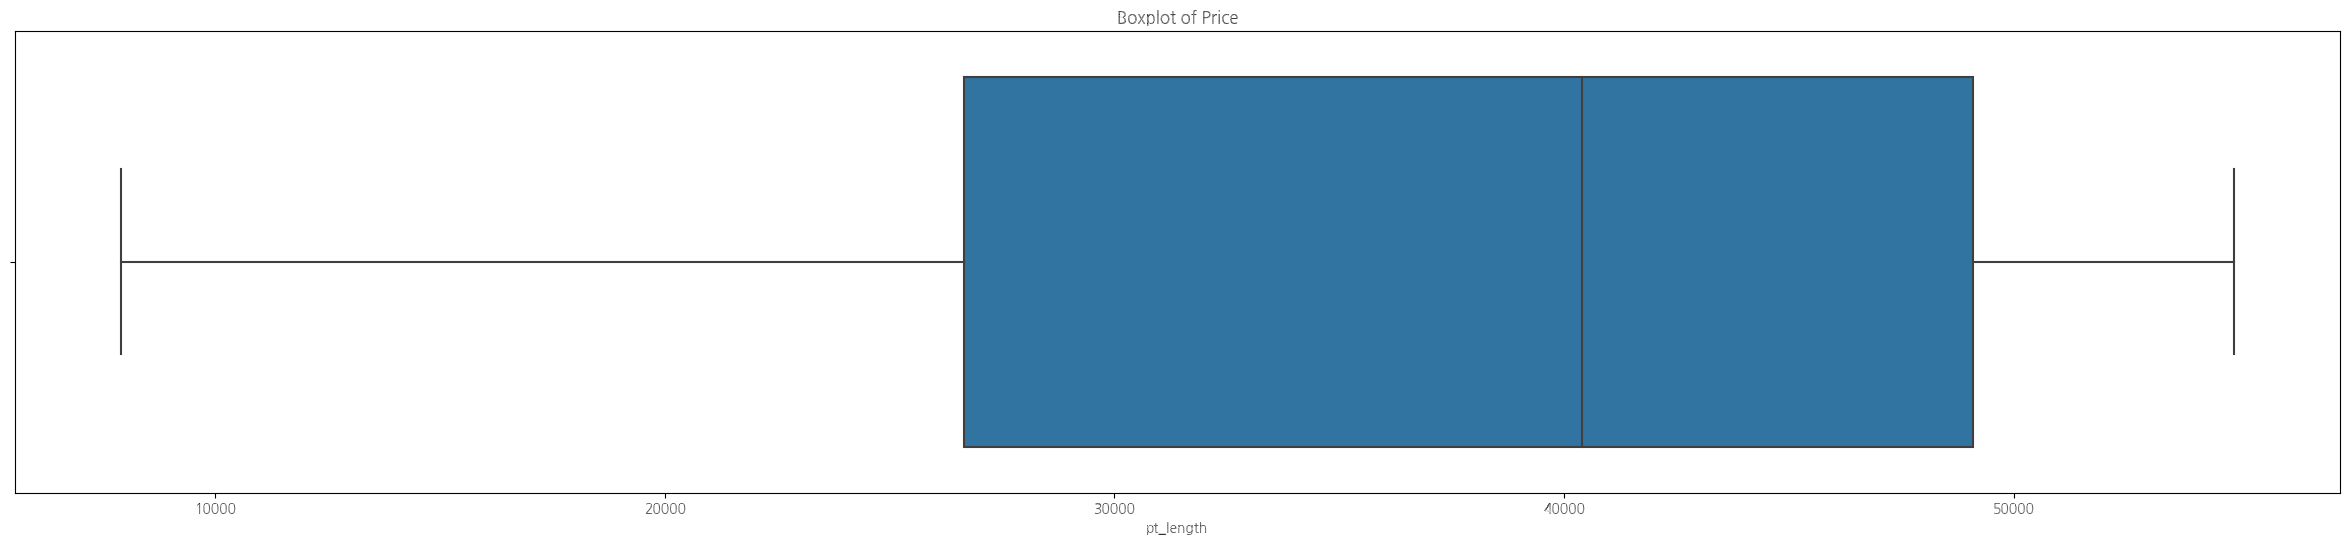

In [22]:
plt.figure(figsize=(30,6))
sns.boxplot(x=df_raw['pt_length'])
plt.title('Boxplot of Price')
plt.xlabel('pt_length')
plt.show()

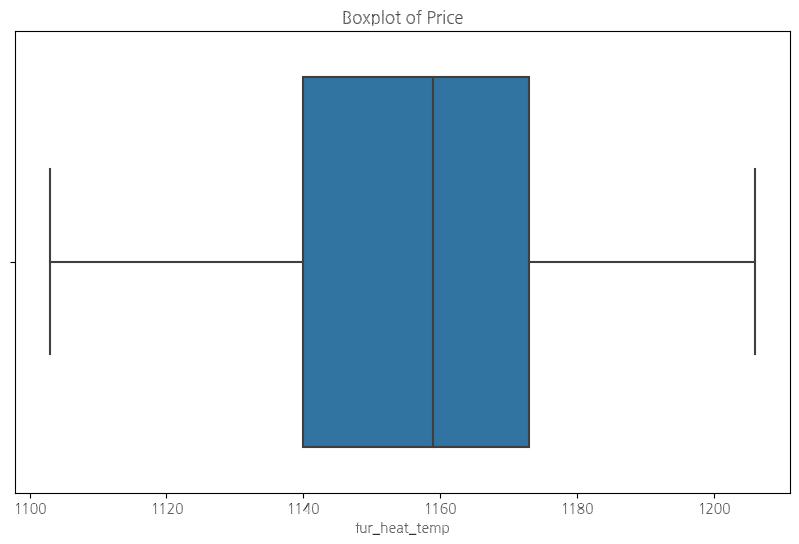

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_raw['fur_heat_temp'])
plt.title('Boxplot of Price')
plt.xlabel('fur_heat_temp')
plt.show()

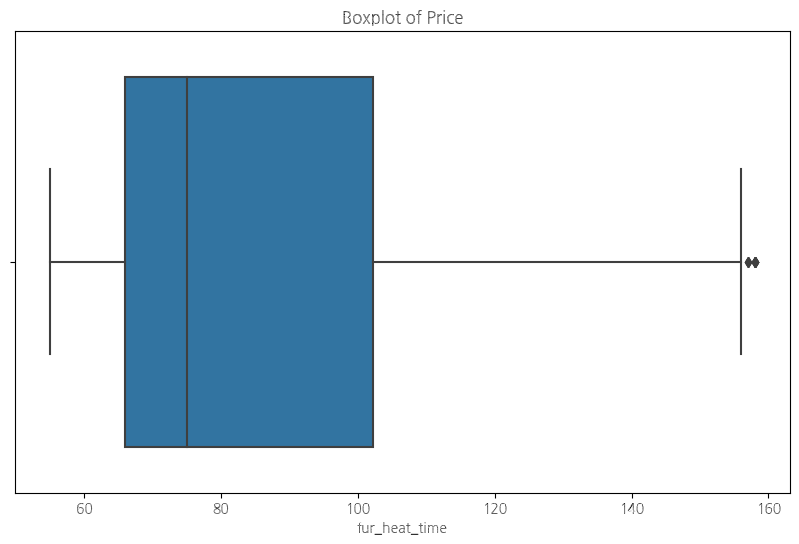

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_raw['fur_heat_time'])
plt.title('Boxplot of Price')
plt.xlabel('fur_heat_time')
plt.show()

In [28]:
new  = df_raw[df_raw['fur_heat_time'] >= 150]
new

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
565,PLT_1566,07JAN2023:05:51:14,양품,PILAC-BT33,한국,T,50,1800,22200,적용,...,1열,1158,156,1122,96,351,CR(제어압연),901,6,2조
567,PLT_1568,07JAN2023:06:06:41,양품,PILAC-BT33,한국,T,50,2600,13100,적용,...,1열,1152,158,1134,78,315,CR(제어압연),900,6,2조
577,PLT_1578,07JAN2023:07:52:09,양품,PILAC-BT33,한국,T,60,2500,13300,적용,...,1열,1142,156,1120,85,304,CR(제어압연),894,6,3조
578,PLT_1579,07JAN2023:08:05:44,양품,PILAC-BT33,한국,T,61,2100,12300,적용,...,2열,1143,155,1122,87,301,CR(제어압연),901,6,3조
651,PLT_1652,07JAN2023:20:11:51,양품,BV-A,프랑스,C,13,3600,51700,적용,...,1열,1169,156,1134,82,303,CR(제어압연),872,10,4조
652,PLT_1653,07JAN2023:20:25:18,양품,KR-A,한국,C,13,3600,51700,적용,...,1열,1169,156,1134,92,307,CR(제어압연),872,10,4조
653,PLT_1654,07JAN2023:20:34:49,양품,NV-A,영국,C,13,3600,51700,적용,...,1열,1169,156,1134,65,284,CR(제어압연),872,10,4조
663,PLT_1664,07JAN2023:22:04:45,양품,KR-A,한국,C,13,3200,42700,적용,...,1열,1160,153,1138,71,317,CR(제어압연),906,10,4조
664,PLT_1665,07JAN2023:22:13:31,양품,NV-A,영국,C,13,3200,42700,적용,...,1열,1160,153,1138,81,322,CR(제어압연),906,10,4조
676,PLT_1677,08JAN2023:00:12:38,양품,NV-A,영국,C,13,2900,52700,적용,...,1열,1154,158,1144,56,308,CR(제어압연),926,10,4조


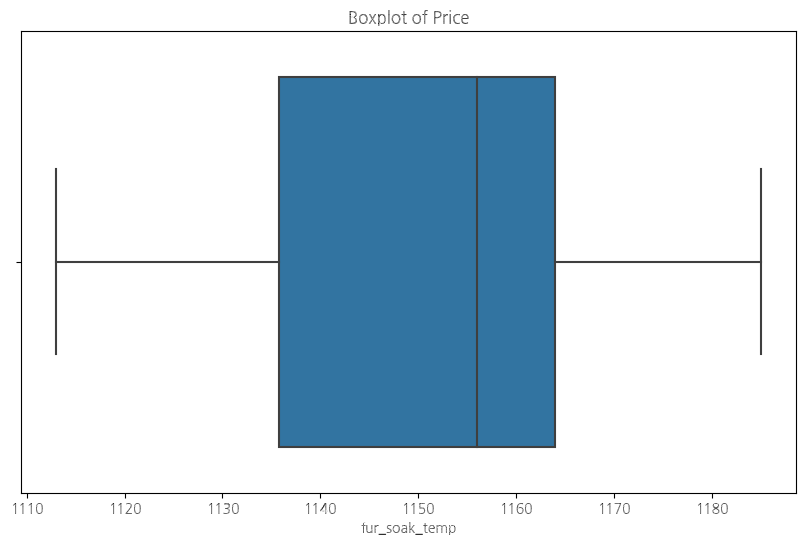

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_raw['fur_soak_temp'])
plt.title('Boxplot of Price')
plt.xlabel('fur_soak_temp')
plt.show()

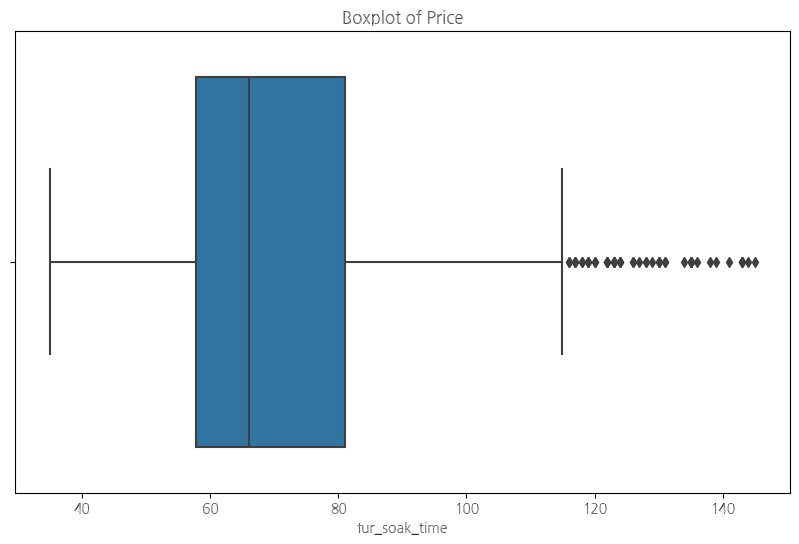

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_raw['fur_soak_time'])
plt.title('Boxplot of Price')
plt.xlabel('fur_soak_time')
plt.show()

In [31]:
new  = df_raw[df_raw['fur_soak_time'] >= 140]
new

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
537,PLT_1538,07JAN2023:01:07:14,양품,NK-KD36-TM,일본,T,40,2600,23400,적용,...,2열,1166,69,1118,141,289,TMCP(온도제어),818,6,2조
612,PLT_1613,07JAN2023:14:07:43,불량,A131-DH36TM,미국,T,71,3600,9200,미적용,...,2열,1128,92,1121,145,332,CR(제어압연),859,6,3조
616,PLT_1617,07JAN2023:14:43:35,양품,AB/EH36-TM,미국,T,77,2600,7900,적용,...,1열,1111,77,1118,144,295,TMCP(온도제어),837,6,3조
617,PLT_1618,07JAN2023:14:52:54,양품,AB/EH36-TM,미국,T,77,2600,7900,적용,...,2열,1113,71,1118,143,316,TMCP(온도제어),842,6,3조
618,PLT_1619,07JAN2023:14:58:32,양품,AB/EH36-TM,미국,T,77,2600,7900,적용,...,1열,1103,68,1122,143,300,TMCP(온도제어),848,6,3조
620,PLT_1621,07JAN2023:15:19:34,양품,COMMON,공통,T,76,1800,16700,적용,...,1열,1124,77,1127,143,326,CR(제어압연),811,6,3조


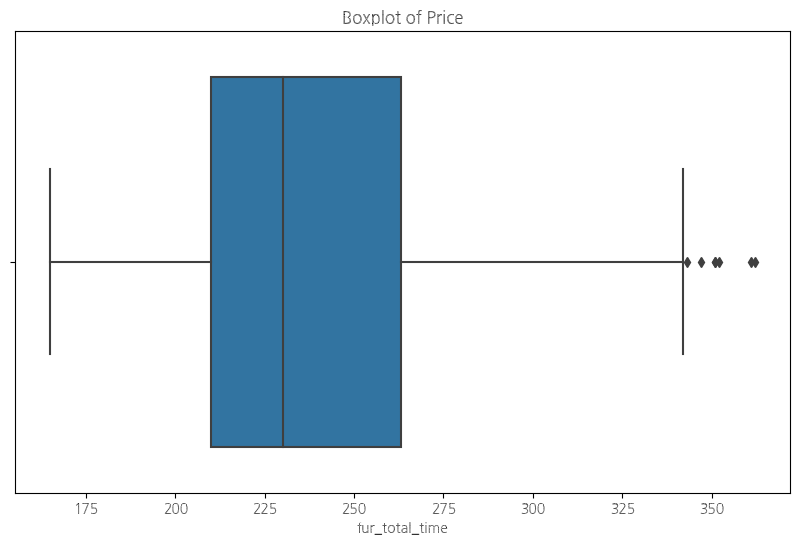

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_raw['fur_total_time'])
plt.title('Boxplot of Price')
plt.xlabel('fur_total_time')
plt.show()

In [76]:
new  = df_raw[df_raw['fur_total_time'] >= 350]
new

,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,...,rolling_method,rolling_temp,descaling_count,work_group,year,month,day,hour,minute,second
559,0,PILAC-BT33,한국,T,50,2500,10900,적용,2호기,1열,...,CR(제어압연),888,6,2조,2023,1,7,4,43,54
565,0,PILAC-BT33,한국,T,50,1800,22200,적용,2호기,1열,...,CR(제어압연),901,6,2조,2023,1,7,5,51,14
662,0,NV-A,영국,C,12,3400,52100,적용,2호기,2열,...,CR(제어압연),887,10,4조,2023,1,7,21,59,5
699,0,GL-A,독일,C,15,3100,51800,적용,1호기,1열,...,CR(제어압연),942,10,4조,2023,1,8,4,0,6
701,0,LR-A,영국,C,15,3100,51800,적용,1호기,1열,...,CR(제어압연),942,10,4조,2023,1,8,4,22,24


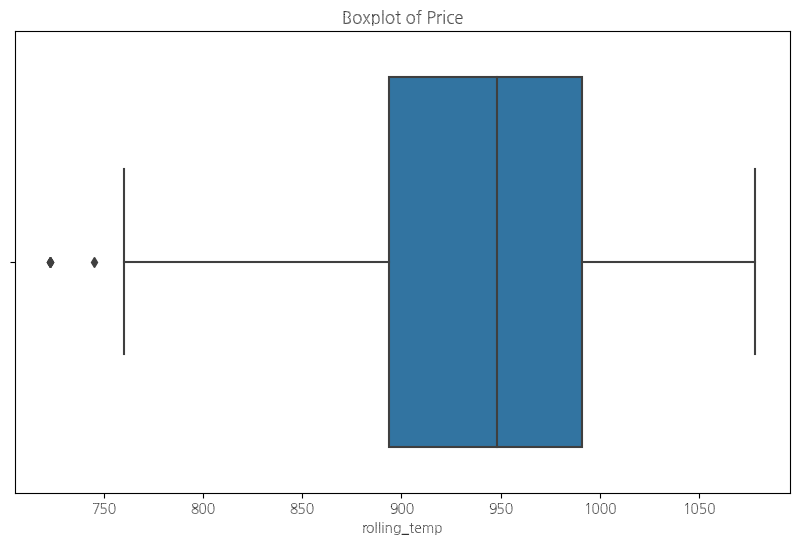

In [91]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_raw['rolling_temp'])
plt.title('Boxplot of Price')
plt.xlabel('rolling_temp')
plt.show()

In [92]:
new  = df_raw[df_raw['rolling_temp'] == 0]
new

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group


In [90]:
# df_raw에서 descaling_count가 0인 행을 삭제하고 원본 데이터프레임을 업데이트
df_raw = df_raw[df_raw['rolling_temp'] != 0]

# 삭제 후 데이터프레임의 정보 확인
df_raw_info = df_raw.info()

df_raw_info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         994 non-null    object
 1   rolling_date     994 non-null    object
 2   scale            994 non-null    object
 3   spec_long        994 non-null    object
 4   spec_country     994 non-null    object
 5   steel_kind       994 non-null    object
 6   pt_thick         994 non-null    int64 
 7   pt_width         994 non-null    int64 
 8   pt_length        994 non-null    int64 
 9   hsb              994 non-null    object
 10  fur_no           994 non-null    object
 11  fur_input_row    994 non-null    object
 12  fur_heat_temp    994 non-null    int64 
 13  fur_heat_time    994 non-null    int64 
 14  fur_soak_temp    994 non-null    int64 
 15  fur_soak_time    994 non-null    int64 
 16  fur_total_time   994 non-null    int64 
 17  rolling_method   994 non-null    ob

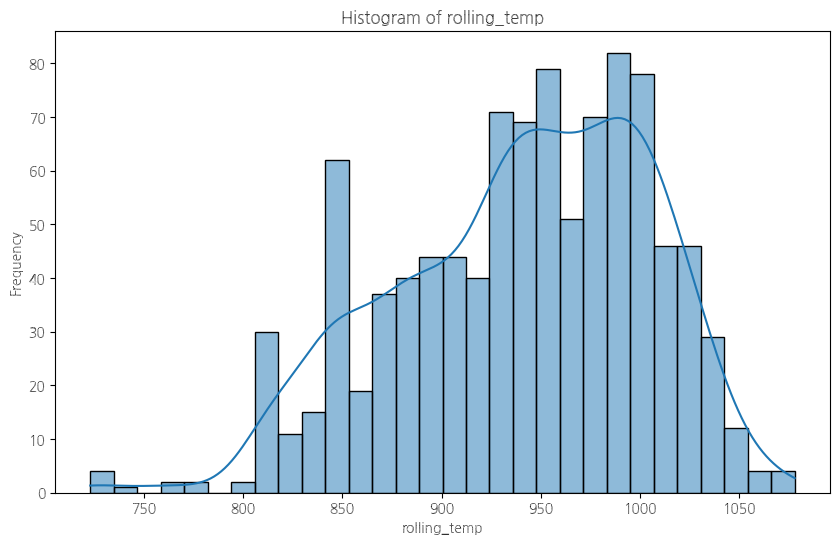

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# rolling_temp가 df_raw의 열에 있다고 가정하고 히스토그램 생성
plt.figure(figsize=(10, 6))
sns.histplot(df_raw['rolling_temp'], bins=30, kde=True)
plt.title('Histogram of rolling_temp')
plt.xlabel('rolling_temp')  # 또는 'Rolling Temperature'와 같은 적절한 이름
plt.ylabel('Frequency')
plt.show()


In [94]:
df_raw['rolling_temp'].value_counts()

993     16
1004    15
956     14
924     13
991     13
        ..
854      1
871      1
868      1
802      1
943      1
Name: rolling_temp, Length: 225, dtype: int64

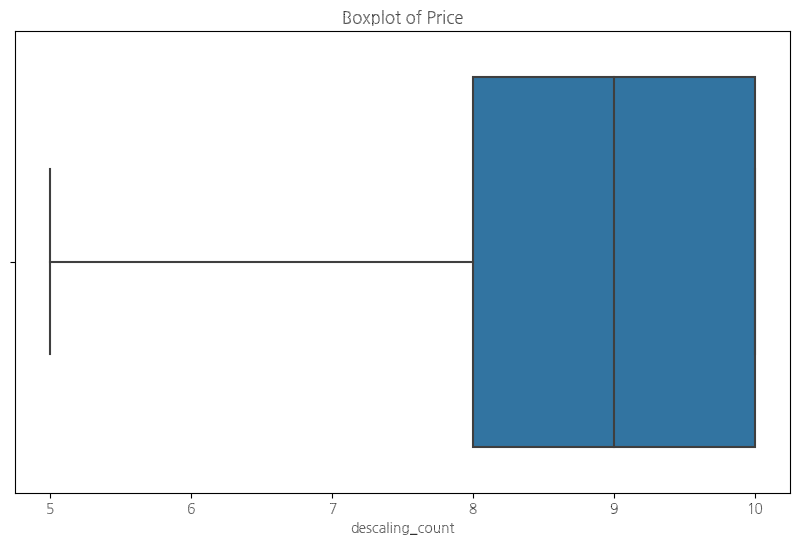

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_raw['descaling_count'])
plt.title('Boxplot of Price')
plt.xlabel('descaling_count')
plt.show()

In [46]:
# rolling_date를 datetime 형식으로 변환
df_raw['rolling_date'] = pd.to_datetime(df_raw['rolling_date'], format='%d%b%Y:%H:%M:%S')

# 다시 각 날짜와 시간을 분리하여 새로운 열 추가
df_raw['year'] = df_raw['rolling_date'].dt.year
df_raw['month'] = df_raw['rolling_date'].dt.month
df_raw['day'] = df_raw['rolling_date'].dt.day
df_raw['hour'] = df_raw['rolling_date'].dt.hour
df_raw['minute'] = df_raw['rolling_date'].dt.minute
df_raw['second'] = df_raw['rolling_date'].dt.second

# 결과 확인
df_raw


,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,rolling_method,rolling_temp,descaling_count,work_group,year,month,day,hour,minute,second
0,PLT_1001,2023-01-03 07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,TMCP(온도제어),934,8,1조,2023,1,3,7,7,53
1,PLT_1002,2023-01-03 07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,TMCP(온도제어),937,8,1조,2023,1,3,7,21,22
2,PLT_1003,2023-01-03 07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,TMCP(온도제어),889,8,1조,2023,1,3,7,31,15
3,PLT_1004,2023-01-03 07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,TMCP(온도제어),885,8,1조,2023,1,3,7,41,1
4,PLT_1005,2023-01-03 07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,TMCP(온도제어),873,8,1조,2023,1,3,7,52,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,2023-01-10 05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,CR(제어압연),948,10,4조,2023,1,10,5,32,25
996,PLT_1997,2023-01-10 05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,CR(제어압연),948,10,4조,2023,1,10,5,39,19
997,PLT_1998,2023-01-10 05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,CR(제어압연),948,10,4조,2023,1,10,5,52,41
998,PLT_1999,2023-01-10 06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,CR(제어압연),948,10,4조,2023,1,10,6,1,50


In [48]:
# rolling_date 열 삭제 (inplace=True)
df_raw.drop(columns=['rolling_date'], inplace=True)

In [49]:
df_raw.drop(columns=['plate_no'], inplace=True)

In [96]:
df_raw['scale'] = df_raw['scale'].apply(lambda x: 1 if x == '불량' else 0)

In [53]:
df_raw

,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,...,rolling_method,rolling_temp,descaling_count,work_group,year,month,day,hour,minute,second
0,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,1열,...,TMCP(온도제어),934,8,1조,2023,1,3,7,7,53
1,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,2열,...,TMCP(온도제어),937,8,1조,2023,1,3,7,21,22
2,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,1열,...,TMCP(온도제어),889,8,1조,2023,1,3,7,31,15
3,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,2열,...,TMCP(온도제어),885,8,1조,2023,1,3,7,41,1
4,0,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,1열,...,TMCP(온도제어),873,8,1조,2023,1,3,7,52,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,BV-A,프랑스,C,19,3400,41500,적용,1호기,2열,...,CR(제어압연),948,10,4조,2023,1,10,5,32,25
996,0,LR-A,영국,C,19,3400,41500,적용,1호기,2열,...,CR(제어압연),948,10,4조,2023,1,10,5,39,19
997,0,AB/AH32,미국,C,17,3400,43700,적용,2호기,2열,...,CR(제어압연),948,10,4조,2023,1,10,5,52,41
998,0,NV-A32,영국,C,17,3400,43700,적용,2호기,2열,...,CR(제어압연),948,10,4조,2023,1,10,6,1,50


Correlation between rolling_temp and target: 0.5113333680204876


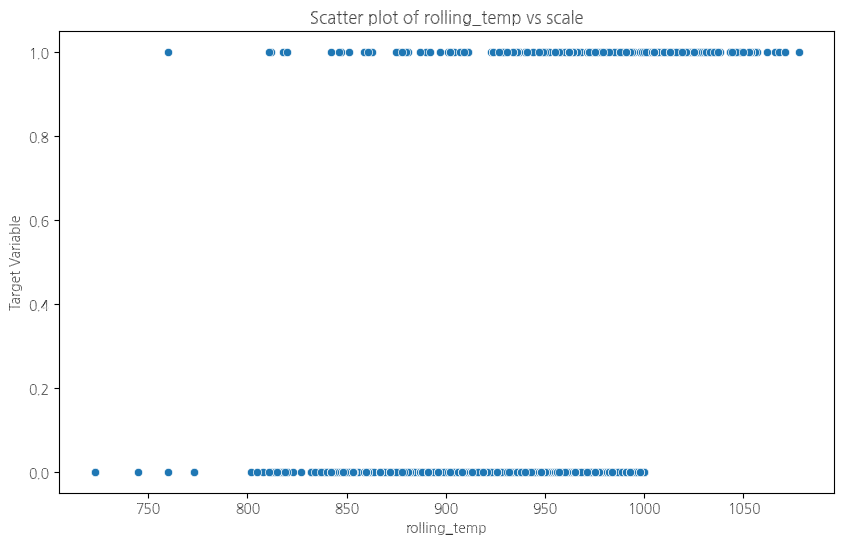

In [97]:
correlation = df_raw['rolling_temp'].corr(df_raw['scale'])
print(f"Correlation between rolling_temp and target: {correlation}")

# 산점도
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rolling_temp', y='scale', data=df_raw)
plt.title('Scatter plot of rolling_temp vs scale')
plt.xlabel('rolling_temp')
plt.ylabel('Target Variable')
plt.show()


In [65]:
correlation = df_raw['rolling_temp'].corr(df_raw['scale'])
print(f"Correlation between rolling_temp and scale: {correlation}")

Correlation between rolling_temp and scale: 0.37570398491337


압연 온도와 스케일의 관계가 강하지 않음

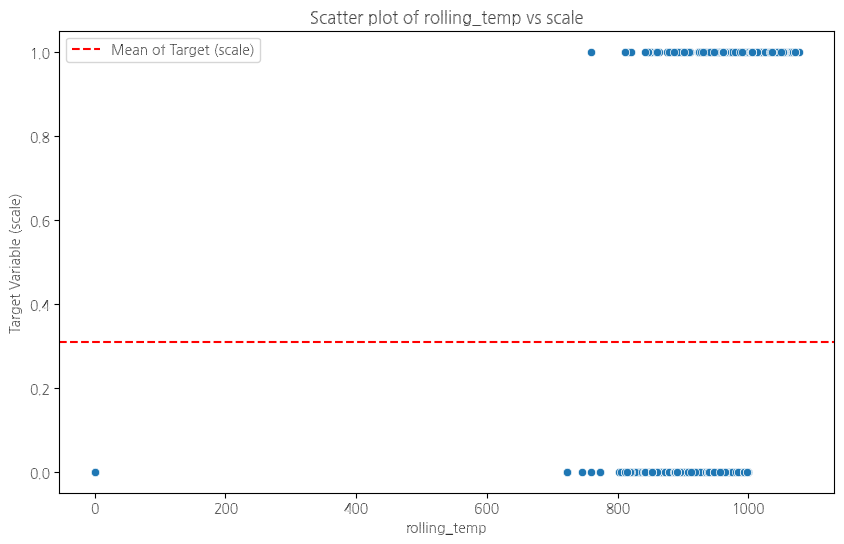

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rolling_temp', y='scale', data=df_raw)
plt.title('Scatter plot of rolling_temp vs scale')
plt.xlabel('rolling_temp')
plt.ylabel('Target Variable (scale)')
plt.axhline(y=df_raw['scale'].mean(), color='r', linestyle='--', label='Mean of Target (scale)')
plt.legend()
plt.show()

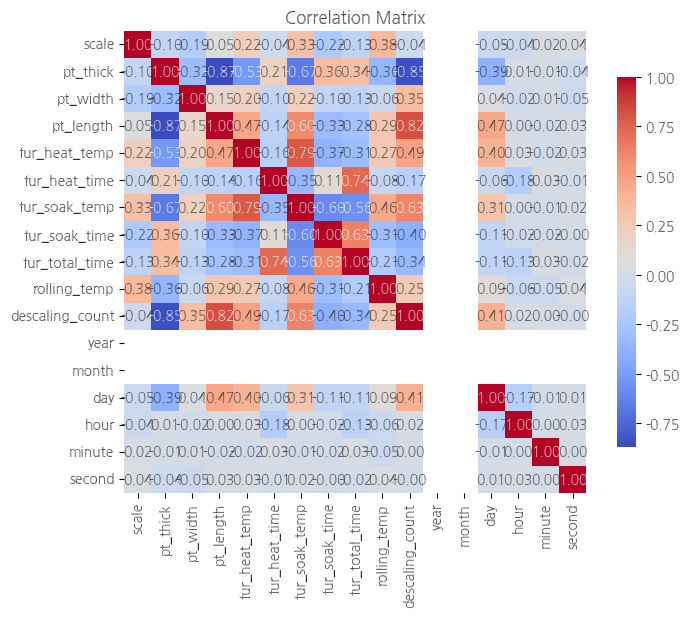

In [67]:
plt.figure(figsize=(8, 6))
correlation_matrix = df_raw.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()